In [1]:
from pathlib import Path
import numpy as np

In [2]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
p = Path("./pok/.")

In [4]:
dirs = p.glob("*")

In [5]:
label = []
img_data = []
label_dict = {"Abra":0,
              "Aerodactyl":1,
             
             
              "Alakazam" : 2}
labeltopok = {0 : "Abra",
              1 : "Aerodactyl",
             
            
              2 : "Alakazam"}
                           
for d in dirs:
    labels = str(d).split("\\")[-1]
    cnt = 0
    print(labels)
    for img in d.glob("*"):
        img1 = image.load_img(img,target_size = (100,100))
        img2 = image.img_to_array(img1)
        img_data.append(img2)
        label.append(label_dict[labels])
        cnt+=1
    print(cnt)
        

Abra
42
Aerodactyl
97
Alakazam
49


In [6]:
X = np.array(img_data)
Y = np.array(label)
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state = 10)

In [7]:
def draw(img,lab):
    plt.title(labeltopok[lab])
    plt.imshow(img/255.0)
    plt.show()

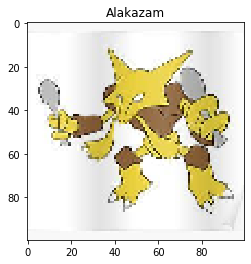

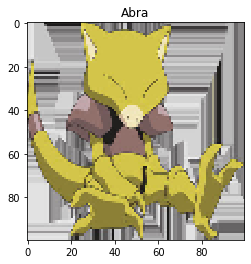

In [8]:
for ix in range(2):
    draw(X[ix],Y[ix])

In [9]:
split = int(0.8*X.shape[0])

In [10]:
xtrain = X[:split,:]
ytrain = Y[:split]
xtest = X[split:,:]
ytest = Y[split:]

In [11]:
xtrains = xtrain.reshape(xtrain.shape[0],-1)
ytrains = ytrain.reshape(ytrain.shape[0],-1)
xtests = xtest.reshape(xtest.shape[0],-1)
ytests = ytest.reshape(ytest.shape[0],-1)

# apply neural network

In [12]:
def softmax(z3):
    epa = np.exp(z3)
    ans = epa/np.sum(epa,axis = 1,keepdims = True)
    return ans
class neuralnetwork:
    def __init__(self,input_size,layer,output_size):
        np.random.seed(10)
        model = {}
        model['W1'] = np.random.randn(input_size,layer[0])
        model['B1'] = np.random.randn(1,layer[0])
        
        model['W2'] = np.random.randn(layer[0],layer[1])
        model['B2'] = np.random.randn(1,layer[1])
        
        model['W3'] = np.random.randn(layer[1],output_size)
        model['B3'] = np.random.randn(1,output_size)
        
        self.model = model
        
    def forward(self,x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        
        z1 = np.dot(x,w1) + b1
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,w2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,w3) + b3
        y_ = softmax(z3)
        self.activation = a1,a2,y_
        return y_
    
    
    def backword(self,x,y,LR =0.0001):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['B1'],self.model['B2'],self.model['B3']
        a1,a2,y_ = self.activation
        m = x.shape[0]
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis = 0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)/float(m)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,w2.T)
        dw1  = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis = 0)/float(m)
        
        ## update weights and bias
        
        self.model["W3"] -= LR*dw3
        self.model["B3"] -= LR*db3
        self.model["W2"] -= LR*dw2
        self.model["B2"] -= LR*db2
        self.model["W1"] -= LR*dw1
        self.model["B1"] -= LR*db1

        return model
    def predict(self,x):
        yout = self.forward(x)
        return np.argmax(yout,axis = 1)
def loss(y_o,p):
    l = -np.mean(y_o*np.log(p))
    return l

def one_hot(y,x,depth):
    m = x.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [13]:
model = neuralnetwork(input_size = 30000,layer = [20,30],output_size = 3)
y_ = model.forward(xtrains)


In [14]:
print(y_.shape)

def train(X,y,model,epoch,lr):
    training_loss = []
    y_ac = one_hot(y,X,3)

    for ix in range(epoch):
        y_p = model.forward(X)
        l = loss(y_ac,y_p)
        training_loss.append(l)
        model.backword(X,y_ac,lr)
    return training_loss

(150, 3)


In [15]:
l = train(xtrains,ytrain,model,200,0.002)

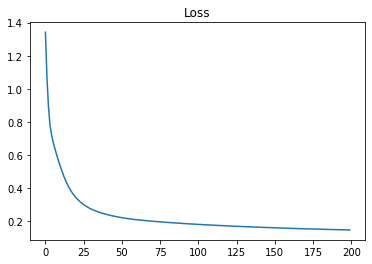

In [20]:
plt.title("Loss")
plt.plot(l)
plt.show()

# Training accuracy

In [17]:
output = model.predict(xtrains)

acc = np.sum(output == ytrains)/ytrains.shape[0]
acc

59.026666666666664